| Problem | Formula|Search Domain|
|---      |----    |----|
|Kur1|${\text{Min}}={\begin{cases}f_{1}\left(x_1,x_2,....,x_n\right)=\sum_{i=1}^{n-1}-10exp^{-0.2\sqrt{x^2_{i}+x^2_{i+1}}}\\f_{2}\left(x_1,x_2,....,x_n\right)=\sum^{n}_{i=1}\|x_i\|^{0.8}+5sinx_i^3\\\end{cases}}$|$-5.05\leq{x_i}\leq{5}, i=1..n$|




In [27]:
import time 
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images

ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.getcwd()),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = get_performance_indicator("igd+", pf)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    output_result = final_result[['Problem', 'Alg_name', 'Evaluations','Iteration', 'Objectives', 'n_variables','pop_size',
    'exec_time', 'hv','igd_plus',
    'hv_exc_time']]
    print(f'ref_point is {ref_point}')
    output_result = output_result.sort_values(['igd_plus','hv'],ascending =False).reset_index(drop=True)
    return output_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

# Kursawe problem 
## - (#variables / #objectives)
## - 2/2
## - 3/2
## - 4/2
## - 5/2
 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [28]:
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 

pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
filename = 'result_all'
path = os.path.join(folder, filename)

result = pd.read_csv(path)


result.loc[:,'path'] = result['path'].str[29:].values
result.loc[:,'image_location'] = result['image_location'].str[29:].values
result.loc[:,'approx_nadir'] = result['approx_nadir'].str[1:-1].values
result = result.drop(columns=['xl','xu'])
result = result.loc[result['Problem']=='KUR1'].reset_index(drop=True)
print(f"The number of records {len(result)}")

The number of records 240


In [29]:
#path and image path indicating location of objective file and visualization file
result.iloc[:,-2:].head(5)

,path,image_location
0,KUR1/AGNOMEN_KUR1_2/KUR1_AGNOMEN_Iteration-500...,Images/KUR1/AGNOMEN_KUR1Var-2/KUR1_AGNOMEN_Ite...
1,KUR1/RNSGA2_KUR1_5/KUR1_RNSGA2_Iteration-50000...,Images/KUR1/RNSGA2_KUR1Var-5/KUR1_RNSGA2_Itera...
2,KUR1/NSGA3_KUR1_2/KUR1_NSGA3_Iteration-500000_...,Images/KUR1/NSGA3_KUR1Var-2/KUR1_NSGA3_Iterati...
3,KUR1/NSGA3_KUR1_3/KUR1_NSGA3_Iteration-500000_...,Images/KUR1/NSGA3_KUR1Var-3/KUR1_NSGA3_Iterati...
4,KUR1/NSGA3_KUR1_4/KUR1_NSGA3_Iteration-500000_...,Images/KUR1/NSGA3_KUR1Var-4/KUR1_NSGA3_Iterati...


In [30]:
# filter kursawe problem based on number of variables
kur1_2 = result.loc[result['n_variables']==2].reset_index(drop=True) # dimension 2 
kur1_3 = result.loc[result['n_variables']==3].reset_index(drop=True) # dimension 3 
kur1_4 = result.loc[result['n_variables']==4].reset_index(drop=True) # dimension 4 
kur1_5 = result.loc[result['n_variables']==5].reset_index(drop=True) # dimension 5

# Kur1 with two variables

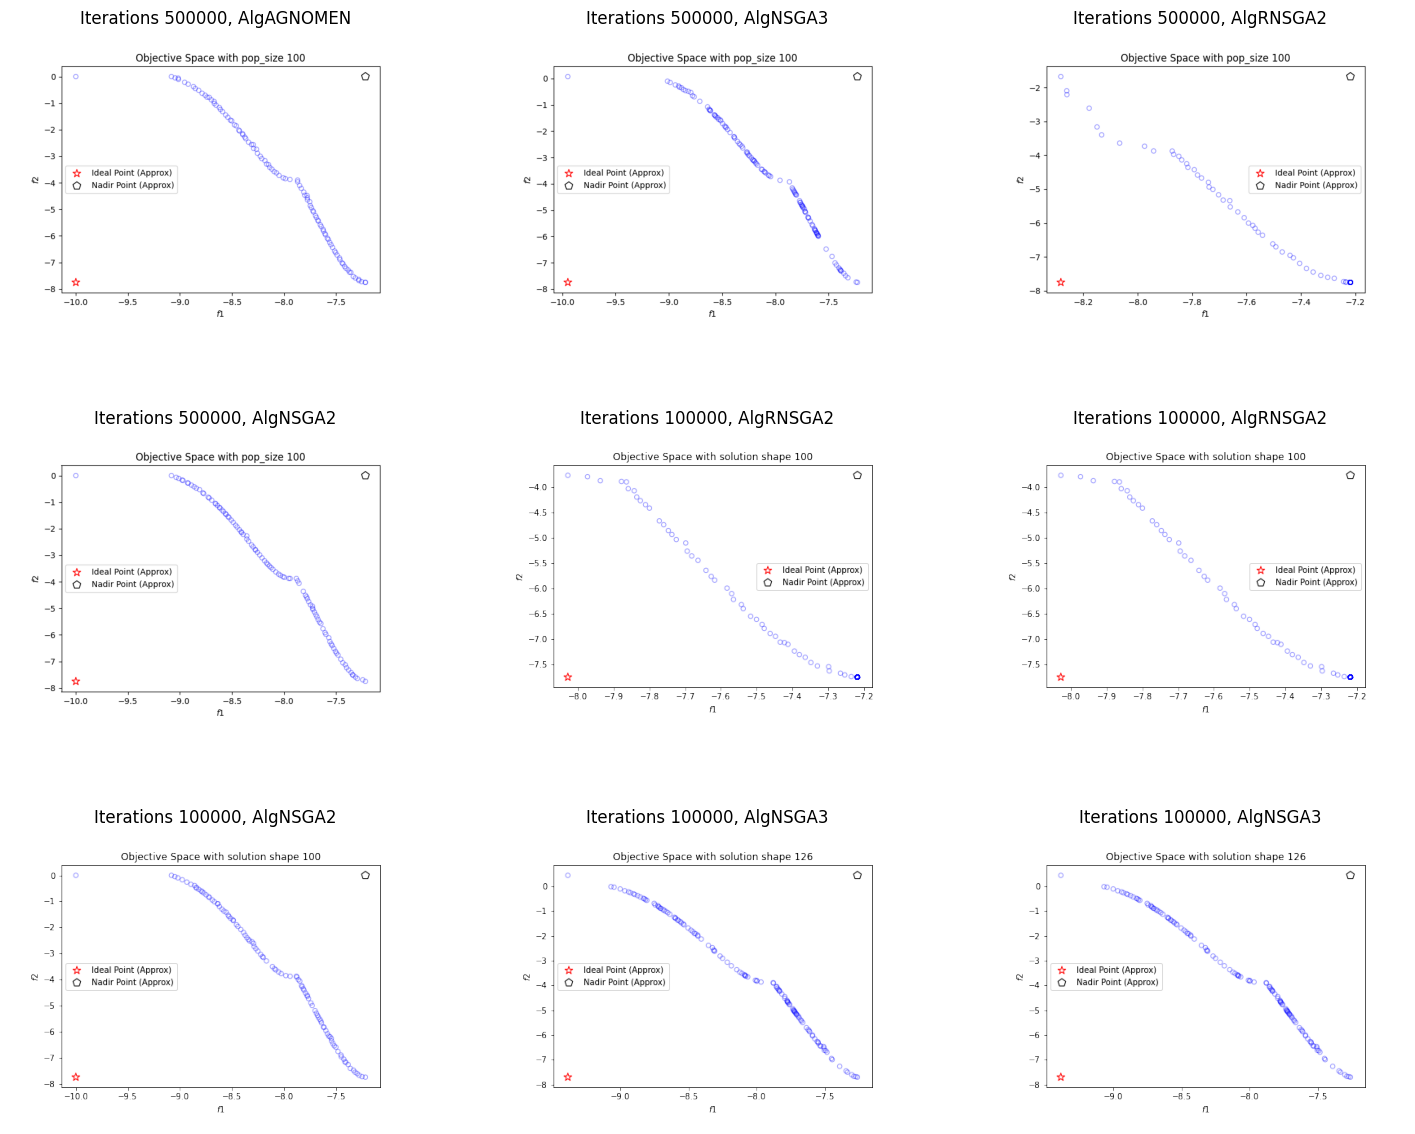

In [31]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_2['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {kur1_2.Iteration[i]}, Alg{kur1_2.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [32]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(kur1_2['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-7.2  ,0])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_2_pf' ))
hv_result(kur1_2)

Global nadir point for kur1 with two variables is :[-7.2   0.44]
ref_point is [-7.2  0. ]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,RNSGA2,4000,100,2,2,40,1.0660787,2.4836059,0.4425567,0.0035629
1,KUR1,RNSGA2,8000,200,2,2,40,1.9071610,3.1700146,0.3697491,0.0037851
2,KUR1,RNSGA2,20000,500,2,2,40,4.0287585,3.2119622,0.3652736,0.0034428
3,KUR1,RNSGA2,40000,1000,2,2,40,9.3908291,3.8485769,0.2890879,0.0035272
4,KUR1,NSGA3,20000,500,2,2,40,2.9613113,6.1424996,0.2057987,0.0045910
5,KUR1,RNSGA2,10000000,100000,2,2,100,1773.8918848,4.7378788,0.1976979,0.0087321
6,KUR1,RNSGA2,10000000,100000,2,2,100,1769.8301806,4.7378788,0.1976979,0.0081646
7,KUR1,RNSGA2,20000,200,2,2,100,3.6954877,5.2201419,0.1451176,0.0086329
8,KUR1,RNSGA2,100000,1000,2,2,100,24.0963006,5.2249979,0.1446385,0.0081179
9,KUR1,RNSGA2,10000,100,2,2,100,2.0953903,5.2873612,0.1373750,0.0106168


In [33]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_2_pf' ))
hv_result(kur1_2)

ref_point is [-1  5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,RNSGA2,4000,100,2,2,40,1.0660787,83.2654349,0.4425567,0.0035710
1,KUR1,RNSGA2,8000,200,2,2,40,1.9071610,84.5525942,0.3697491,0.0039399
2,KUR1,RNSGA2,20000,500,2,2,40,4.0287585,84.6412229,0.3652736,0.0036077
3,KUR1,RNSGA2,40000,1000,2,2,40,9.3908291,86.2397155,0.2890879,0.0045402
4,KUR1,NSGA3,20000,500,2,2,40,2.9613113,94.3775434,0.2057987,0.0044999
5,KUR1,RNSGA2,10000000,100000,2,2,100,1773.8918848,87.9403283,0.1976979,0.0081489
6,KUR1,RNSGA2,10000000,100000,2,2,100,1769.8301806,87.9403283,0.1976979,0.0094259
7,KUR1,RNSGA2,20000,200,2,2,100,3.6954877,89.2381569,0.1451176,0.0095491
8,KUR1,RNSGA2,100000,1000,2,2,100,24.0963006,89.1484624,0.1446385,0.0081260
9,KUR1,RNSGA2,10000,100,2,2,100,2.0953903,89.4048751,0.1373750,0.0085192


# Kur1 with three variables

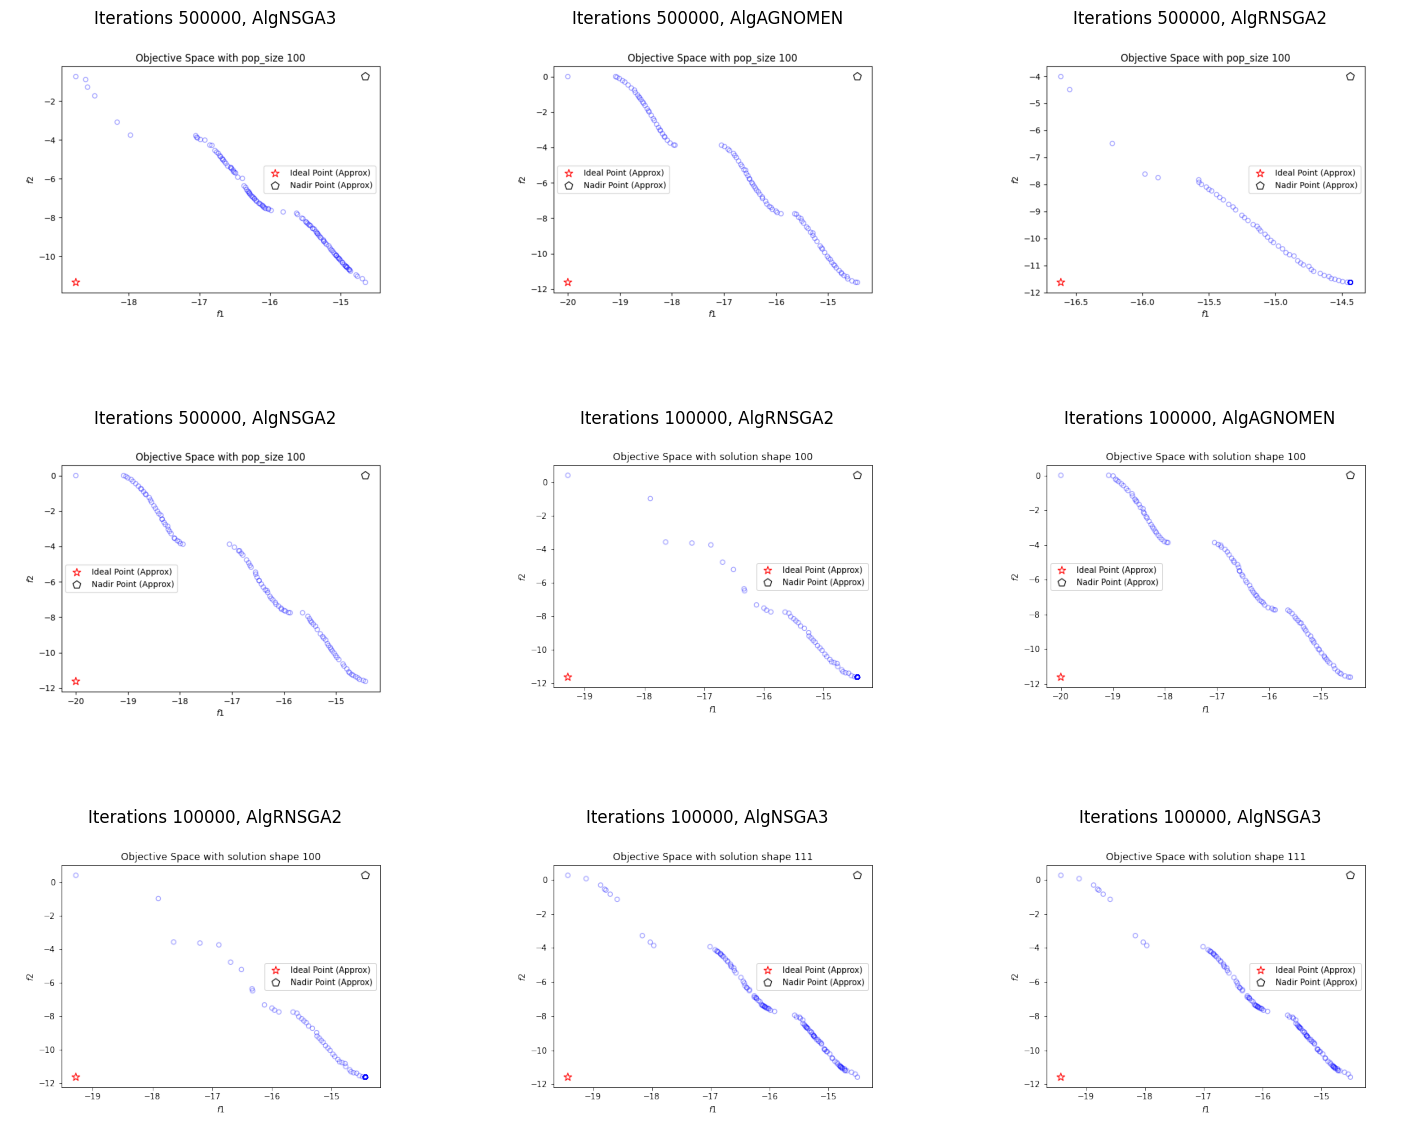

In [34]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_3['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {kur1_3.Iteration[i]}, Alg{kur1_3.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [35]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(kur1_3['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-14,0]) #check figure 
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_3_pf' ))
hv_result(kur1_3)

Global nadir point for kur1 with two variables is :[-14.43   2.37]
ref_point is [-14   0]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,RNSGA2,4000,100,2,3,40,0.8017535,10.0226833,1.3550706,0.0029523
1,KUR1,RNSGA2,8000,200,2,3,40,1.5648870,10.9095266,1.3001431,0.0030699
2,KUR1,RNSGA2,40000,1000,2,3,40,7.9122844,11.3092761,1.2750892,0.0028999
3,KUR1,RNSGA2,20000,500,2,3,40,4.2494674,19.1827452,0.7612419,0.0028710
4,KUR1,RNSGA2,50000000,500000,2,3,100,8821.2963924,22.8754044,0.5392986,0.0077522
5,KUR1,NSGA3,40000,1000,2,3,40,5.8392487,25.7083105,0.4351310,0.0036418
6,KUR1,RNSGA2,50000,500,2,3,100,8.6392467,24.1184897,0.4226518,0.0069399
7,KUR1,RNSGA2,100000,1000,2,3,100,17.2353430,23.9859553,0.4159679,0.0071020
8,KUR1,NSGA3,4000,100,2,3,40,0.6227977,28.3886263,0.4138717,0.0034208
9,KUR1,RNSGA2,20000,200,2,3,100,3.3784440,25.9692572,0.2718104,0.0075908


In [36]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_3_pf' ))
hv_result(kur1_3)

ref_point is [-1  5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,RNSGA2,4000,100,2,3,40,0.8017535,230.5597758,1.3550706,0.0030577
1,KUR1,RNSGA2,8000,200,2,3,40,1.5648870,231.8885969,1.3001431,0.0030661
2,KUR1,RNSGA2,40000,1000,2,3,40,7.9122844,232.4937877,1.2750892,0.0028970
3,KUR1,RNSGA2,20000,500,2,3,40,4.2494674,245.8734044,0.7612419,0.0029080
4,KUR1,RNSGA2,50000000,500000,2,3,100,8821.2963924,252.0959844,0.5392986,0.0069928
5,KUR1,NSGA3,40000,1000,2,3,40,5.8392487,253.9837573,0.4351310,0.0037179
6,KUR1,RNSGA2,50000,500,2,3,100,8.6392467,256.3970936,0.4226518,0.0070350
7,KUR1,RNSGA2,100000,1000,2,3,100,17.2353430,258.9705342,0.4159679,0.0071371
8,KUR1,NSGA3,4000,100,2,3,40,0.6227977,254.8126873,0.4138717,0.0034680
9,KUR1,RNSGA2,20000,200,2,3,100,3.3784440,262.5792495,0.2718104,0.0069611


# Kur1 with four variables

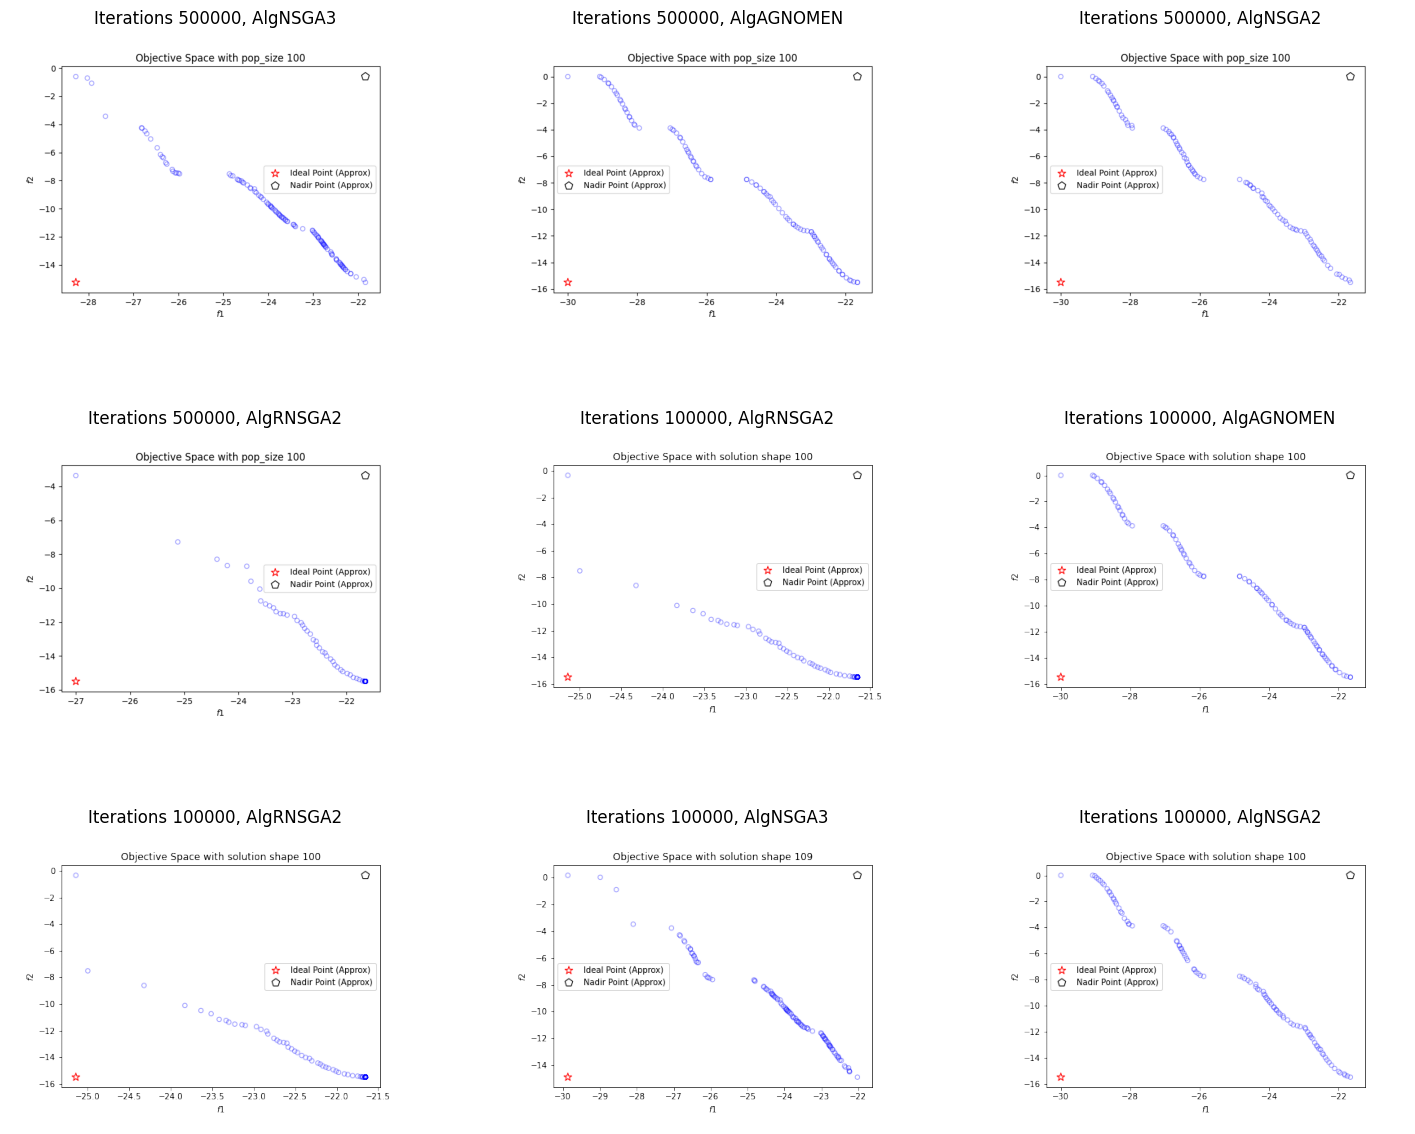

In [37]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_4['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {kur1_4.Iteration[i]}, Alg{kur1_4.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [38]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(kur1_4['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-21 ,0])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_4_pf' ))
hv_result(kur1_4)

Global nadir point for kur1 with two variables is :[-21.58   0.59]
ref_point is [-21   0]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,RNSGA2,20000,500,2,4,40,4.0978100,17.5157546,2.0039850,0.0025978
1,KUR1,RNSGA2,4000,100,2,4,40,0.8408177,19.8591252,1.9006060,0.0025678
2,KUR1,RNSGA2,40000,1000,2,4,40,8.3749425,20.3128590,1.8819178,0.0024860
3,KUR1,RNSGA2,8000,200,2,4,40,1.7024088,25.6881380,1.6478192,0.0026021
4,KUR1,RNSGA2,50000,500,2,4,100,8.9197176,33.9132858,1.3019827,0.0060670
5,KUR1,RNSGA2,20000,200,2,4,100,3.5162318,37.0534583,1.1734390,0.0068622
6,KUR1,RNSGA2,10000000,100000,2,4,100,1716.4007382,47.2050271,0.7659143,0.0064499
7,KUR1,RNSGA2,10000000,100000,2,4,100,1716.8196359,47.2050271,0.7659143,0.0064929
8,KUR1,NSGA3,4000,100,2,4,40,0.5643294,60.5005782,0.6751361,0.0031807
9,KUR1,RNSGA2,10000,100,2,4,100,1.7918577,50.2257019,0.6506440,0.0061147


In [39]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_4_pf' ))
hv_result(kur1_4)

ref_point is [-1  5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,RNSGA2,20000,500,2,4,40,4.0978100,433.3328119,2.0039850,0.0033829
1,KUR1,RNSGA2,4000,100,2,4,40,0.8408177,436.3106438,1.9006060,0.0025873
2,KUR1,RNSGA2,40000,1000,2,4,40,8.3749425,437.2218911,1.8819178,0.0024719
3,KUR1,RNSGA2,8000,200,2,4,40,1.7024088,444.6329851,1.6478192,0.0026002
4,KUR1,RNSGA2,50000,500,2,4,100,8.9197176,456.2192786,1.3019827,0.0060329
5,KUR1,RNSGA2,20000,200,2,4,100,3.5162318,460.8742593,1.1734390,0.0060649
6,KUR1,RNSGA2,10000000,100000,2,4,100,1716.4007382,477.9714127,0.7659143,0.0061314
7,KUR1,RNSGA2,10000000,100000,2,4,100,1716.8196359,477.9714127,0.7659143,0.0061042
8,KUR1,NSGA3,4000,100,2,4,40,0.5643294,478.2758231,0.6751361,0.0032089
9,KUR1,RNSGA2,10000,100,2,4,100,1.7918577,483.1216563,0.6506440,0.0061009


# Kur1 with five variables

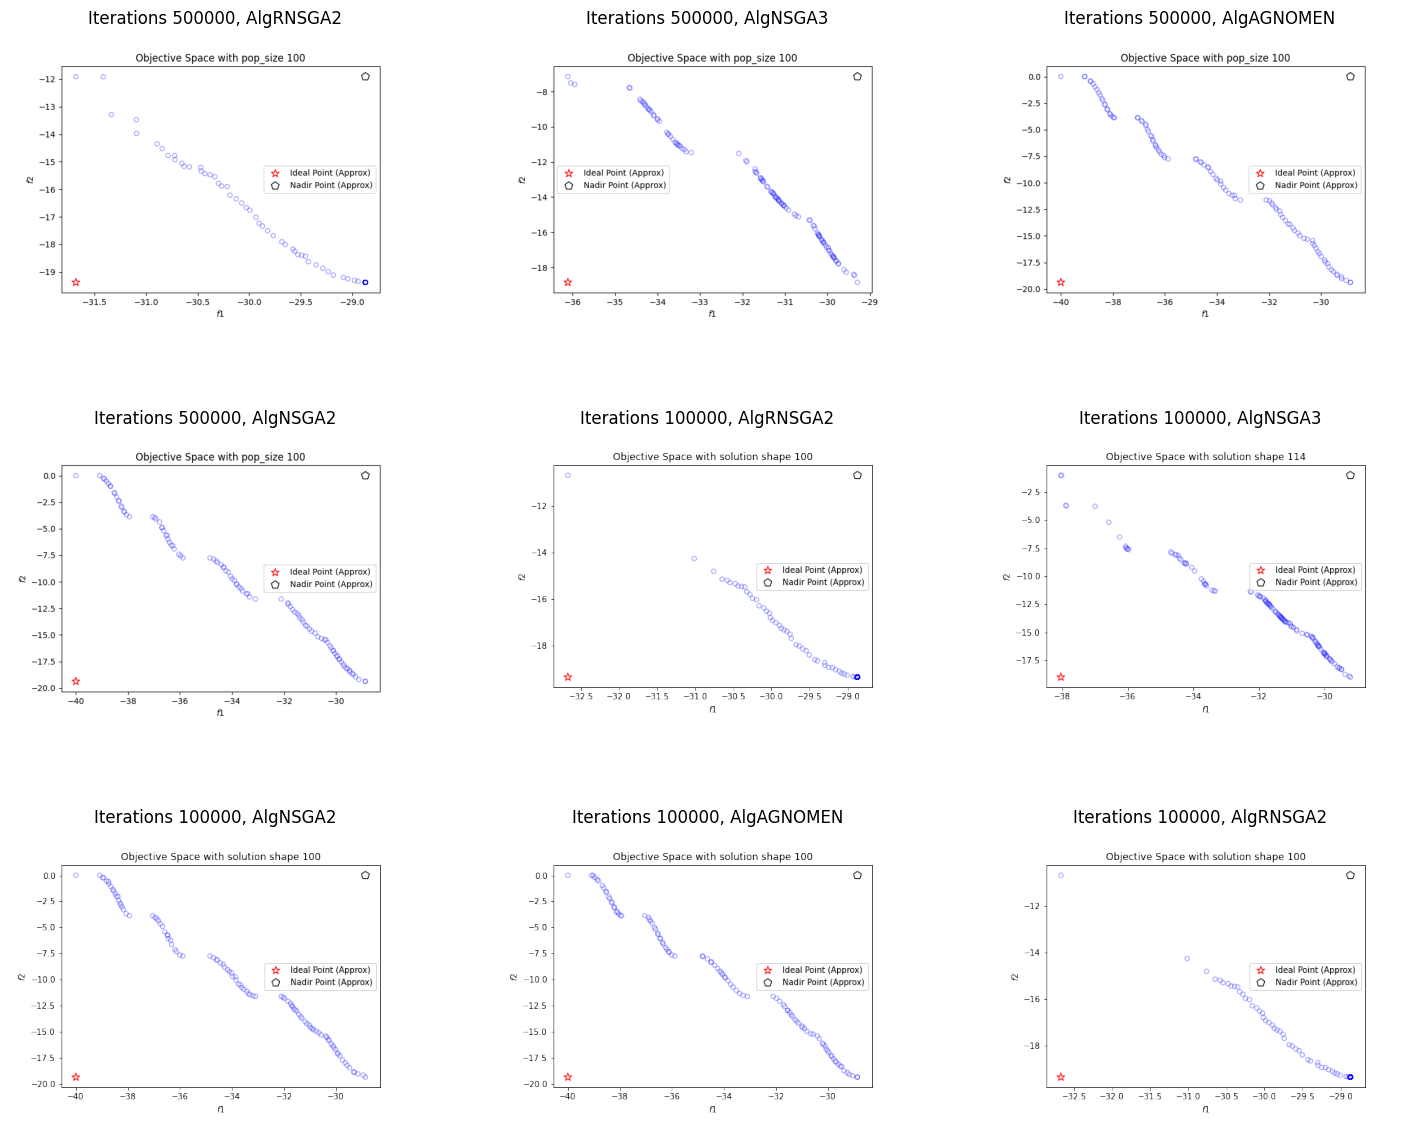

In [40]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_5['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {kur1_5.Iteration[i]}, Alg{kur1_5.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [41]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(kur1_5['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-25,0])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_5_pf' ))
hv_result(kur1_5)

Global nadir point for kur1 with two variables is :[-25.76   0.62]
ref_point is [-25   0]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,RNSGA2,8000,200,2,5,40,1.5778933,86.8478590,2.8287629,0.0024798
1,KUR1,RNSGA2,40000,1000,2,5,40,8.0630739,88.3098874,2.7787945,0.0024691
2,KUR1,RNSGA2,4000,100,2,5,40,1.0299115,99.2833600,2.4092305,0.0024550
3,KUR1,RNSGA2,20000,500,2,5,40,4.2131202,100.0140261,2.3809017,0.0024624
4,KUR1,RNSGA2,10000,100,2,5,100,1.7057407,108.1153012,2.1096081,0.0058489
5,KUR1,RNSGA2,50000,500,2,5,100,8.8542814,110.7317345,2.0222680,0.0057788
6,KUR1,NSGA3,8000,200,2,5,40,1.1381195,129.6995907,1.9467466,0.0028589
7,KUR1,RNSGA2,20000,200,2,5,100,3.7244105,114.4254254,1.8970807,0.0065260
8,KUR1,RNSGA2,50000000,500000,2,5,100,8727.7082460,119.6614197,1.7238855,0.0063658
9,KUR1,RNSGA2,100000,1000,2,5,100,18.4866951,120.8752780,1.6856417,0.0058041


In [42]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_5_pf' ))
hv_result(kur1_5)

ref_point is [-1  5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,RNSGA2,8000,200,2,5,40,1.5778933,694.4071685,2.8287629,0.0024190
1,KUR1,RNSGA2,40000,1000,2,5,40,8.0630739,696.3004546,2.7787945,0.0024199
2,KUR1,RNSGA2,4000,100,2,5,40,1.0299115,710.0411834,2.4092305,0.0023561
3,KUR1,RNSGA2,20000,500,2,5,40,4.2131202,711.7802242,2.3809017,0.0024192
4,KUR1,RNSGA2,10000,100,2,5,100,1.7057407,722.0238164,2.1096081,0.0057361
5,KUR1,RNSGA2,50000,500,2,5,100,8.8542814,725.8460173,2.0222680,0.0063851
6,KUR1,NSGA3,8000,200,2,5,40,1.1381195,713.9879176,1.9467466,0.0028977
7,KUR1,RNSGA2,20000,200,2,5,100,3.7244105,730.8552629,1.8970807,0.0057430
8,KUR1,RNSGA2,50000000,500000,2,5,100,8727.7082460,738.1656874,1.7238855,0.0060663
9,KUR1,RNSGA2,100000,1000,2,5,100,18.4866951,739.8642329,1.6856417,0.0057433
